In [1]:
import pandas as pd

In [2]:
house = pd.read_csv("resources/housing.csv")
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
from statistics import median
print(f"Medyan = {house.total_bedrooms.median()}")
print(f"Ortalama = {house.total_bedrooms.mean()}")

Medyan = 435.0
Ortalama = 537.8705525375618


<Axes: xlabel='total_bedrooms', ylabel='Count'>

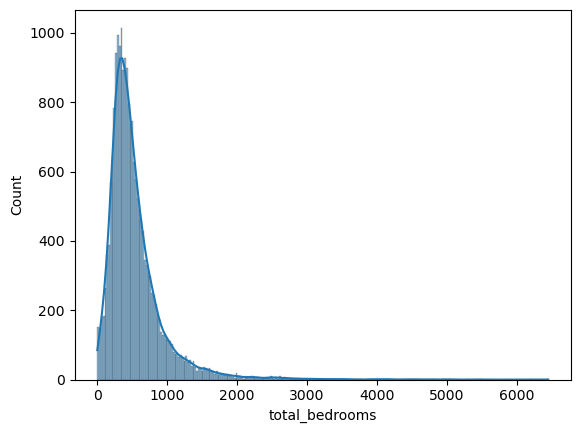

In [8]:
import seaborn as sns
sns.histplot(house.total_bedrooms, kde=True)

In [9]:
house.dropna(inplace=True)
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
from scipy.stats import skew
skew(house.total_bedrooms)

3.45929235876747

In [12]:
house.drop("ocean_proximity", axis=1).corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


<Axes: >

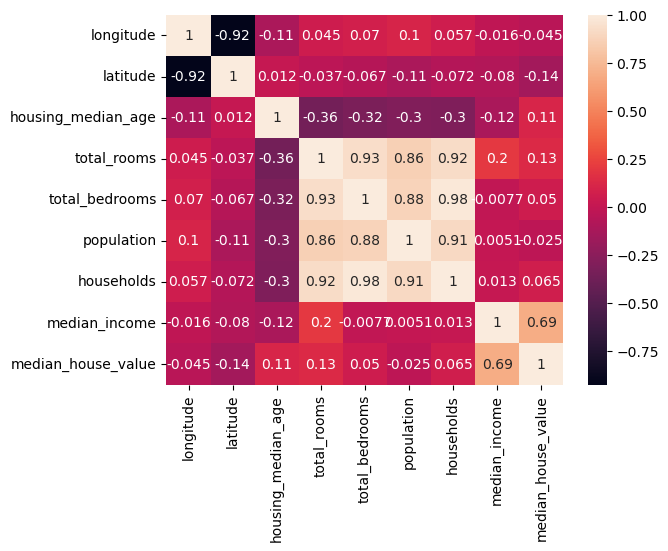

In [13]:
sns.heatmap(house.drop("ocean_proximity", axis=1).corr(), annot=True)

In [14]:
X = house[["median_income", "ocean_proximity"]]
X

,median_income,ocean_proximity
0,8.3252,NEAR BAY
1,8.3014,NEAR BAY
2,7.2574,NEAR BAY
3,5.6431,NEAR BAY
4,3.8462,NEAR BAY
...,...,...
20635,1.5603,INLAND
20636,2.5568,INLAND
20637,1.7000,INLAND
20638,1.8672,INLAND


In [15]:
y = house["median_house_value"]
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [17]:
pd.get_dummies(house.ocean_proximity, dtype=int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [19]:
X = X.join(pd.get_dummies(house.ocean_proximity, dtype=int))

In [20]:
X

,median_income,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,8.3252,NEAR BAY,0,0,0,1,0
1,8.3014,NEAR BAY,0,0,0,1,0
2,7.2574,NEAR BAY,0,0,0,1,0
3,5.6431,NEAR BAY,0,0,0,1,0
4,3.8462,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...
20635,1.5603,INLAND,0,1,0,0,0
20636,2.5568,INLAND,0,1,0,0,0
20637,1.7000,INLAND,0,1,0,0,0
20638,1.8672,INLAND,0,1,0,0,0


In [21]:
X.drop("ocean_proximity", axis=1, inplace=True)
X

,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,8.3252,0,0,0,1,0
1,8.3014,0,0,0,1,0
2,7.2574,0,0,0,1,0
3,5.6431,0,0,0,1,0
4,3.8462,0,0,0,1,0
...,...,...,...,...,...,...
20635,1.5603,0,1,0,0,0
20636,2.5568,0,1,0,0,0
20637,1.7000,0,1,0,0,0
20638,1.8672,0,1,0,0,0


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    random_state=42
                                                   )

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
model.coef_

array([  37042.78919954,  -43061.24600151, -121026.37632293,
        216061.51331833,  -24702.95813541,  -27270.93285848])

In [29]:
X.columns

Index(['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [30]:
model.intercept_

126758.23835447588

In [31]:
from sklearn.metrics import r2_score

In [32]:
y_test_predict = model.predict(X_test)

In [33]:
r2_score(y_test, y_test_predict)

0.5886326488975673

In [ ]:
import plotly.express as px

px.scatter(data_frame=house, x="longitude", y="latitude", 
          size=house.population / 100, color="median_house_value",
          hover_data=["ocean_proximity"], opacity=0.3)